<a href="https://colab.research.google.com/github/anudarii3636/AI/blob/main/midterm_21102455.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 31s 0us/step


In [3]:
x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten


In [5]:
model = Sequential([
    Flatten(input_shape=(32,32,3)),

    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(10, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
import tensorflow as tf

(_, y_train_labels), (_, y_test_labels) = cifar10.load_data()

y_train = tf.keras.utils.to_categorical(y_train_labels, 10)
y_test = tf.keras.utils.to_categorical(y_test_labels, 10)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=64,
    validation_split=0.1
)

Epoch 1/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.4437 - loss: 1.5591 - val_accuracy: 0.4686 - val_loss: 1.4845
Epoch 2/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 23s 33ms/step - accuracy: 0.4514 - loss: 1.5496 - val_accuracy: 0.4636 - val_loss: 1.5021
Epoch 3/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 0.4520 - loss: 1.5395 - val_accuracy: 0.4470 - val_loss: 1.5526
Epoch 4/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 40s 31ms/step - accuracy: 0.4495 - loss: 1.5411 - val_accuracy: 0.4378 - val_loss: 1.5472
Epoch 5/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.4496 - loss: 1.5546 - val_accuracy: 0.4812 - val_loss: 1.4671
Epoch 6/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 23s 33ms/step - accuracy: 0.4538 - loss: 1.5350 - val_accuracy: 0.4950 - val_loss: 1.4663
Epoch 7/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.4568 - loss: 1.5245 - val_accuracy: 0.4752 - val_loss: 1.4821
Epoch 8/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 23s 32ms/step - accuracy: 0.4570 - loss: 1.5234 - 

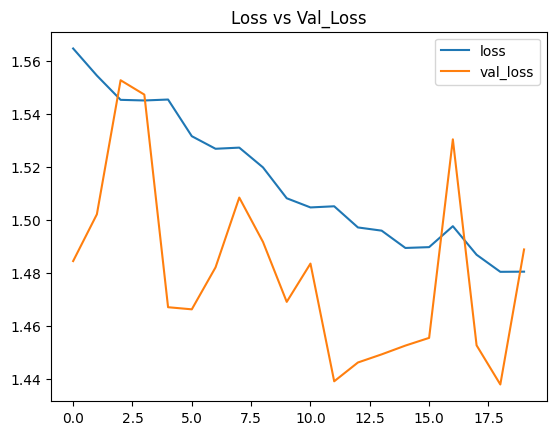

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs Val_Loss')
plt.legend(['loss', 'val_loss'])
plt.show()


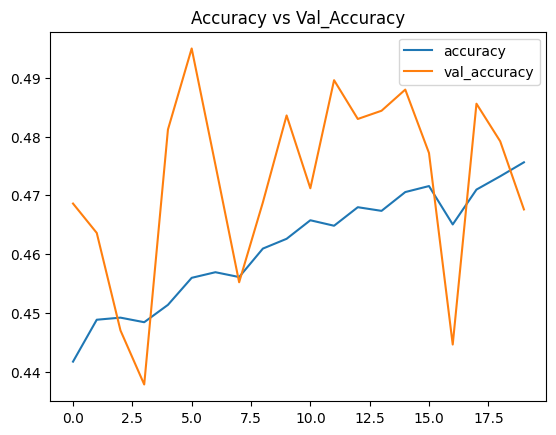

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs Val_Accuracy')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()


In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4668 - loss: 1.4828
Test Loss: 1.4929988384246826
Test Accuracy: 0.460099995136261


In [11]:
model2 = Sequential([
    Flatten(input_shape=(32,32,3)),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history2 = model2.fit(
    x_train, y_train,
    epochs=80,
    batch_size=128,
    validation_split=0.1
)


Epoch 1/80
352/352 ━━━━━━━━━━━━━━━━━━━━ 22s 53ms/step - accuracy: 0.2689 - loss: 2.2717 - val_accuracy: 0.3220 - val_loss: 1.9324
Epoch 2/80
352/352 ━━━━━━━━━━━━━━━━━━━━ 19s 53ms/step - accuracy: 0.3721 - loss: 1.7598 - val_accuracy: 0.3656 - val_loss: 1.7624
Epoch 3/80
352/352 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - accuracy: 0.4144 - loss: 1.6402 - val_accuracy: 0.3766 - val_loss: 1.7012
Epoch 4/80
352/352 ━━━━━━━━━━━━━━━━━━━━ 19s 53ms/step - accuracy: 0.4387 - loss: 1.5777 - val_accuracy: 0.3846 - val_loss: 1.7327
Epoch 5/80
352/352 ━━━━━━━━━━━━━━━━━━━━ 21s 55ms/step - accuracy: 0.4396 - loss: 1.5642 - val_accuracy: 0.4484 - val_loss: 1.5296
Epoch 6/80
352/352 ━━━━━━━━━━━━━━━━━━━━ 20s 56ms/step - accuracy: 0.4418 - loss: 1.5521 - val_accuracy: 0.4576 - val_loss: 1.5313
Epoch 7/80
352/352 ━━━━━━━━━━━━━━━━━━━━ 18s 51ms/step - accuracy: 0.4472 - loss: 1.5427 - val_accuracy: 0.4238 - val_loss: 1.6050
Epoch 8/80
352/352 ━━━━━━━━━━━━━━━━━━━━ 22s 54ms/step - accuracy: 0.4529 - loss: 1.5336 - 